# <span style="color:blue"> Przyklad 21 STR. 132 MASS_PULP wersja 1.0

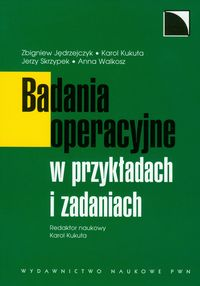

In [1]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszyny:", "DETAL1","DETAL2","DETAL3","DETAL4","DETAL5", "czas", "koszt H"]
table.append_row(["masz S1", 75,    60,   150,  30, 96,'<=10800 min', 30 ])
table.append_row(["masz S2", 80,    100,  120,  32, 100,'<=10800 min', 42 ])
table.append_row(["masz S3", 48,    50,   160,   40, 120,'<=10800 min' , 36])
table.append_row(["detALe", ">=90",   ">=90",  ">=90",  ">=75",">=75",0, 0 ])
print(table)

+---------+--------+--------+--------+--------+--------+--------------+--------+
| Maszyny | DETAL1 | DETAL2 | DETAL3 | DETAL4 | DETAL5 |     czas     | koszt  |
|    :    |        |        |        |        |        |              |   H    |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S1 |   75   |   60   |  150   |   30   |   96   | <=10800 min  |   30   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S2 |   80   |  100   |  120   |   32   |  100   | <=10800 min  |   42   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S3 |   48   |   50   |  160   |   40   |  120   | <=10800 min  |   36   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| detALe  |  >=90  |  >=90  |  >=90  |  >=75  |  >=75  |      0       |   0    |
+---------+--------+--------+--------+--------+--------+--------------+--------+


## Jaka jest funkcja celu (czyli czym jest x)?

Rodzielić produkcję detali pomiedzy maszyny - <span style="font-size: 150%;color:#0000ff">czyli xij to znaczy ile i-tych detali będzie wyprodukowanych na j-tych maszynach.</span>

W tabelce jest ilość minut potrzebnych na wyprodukowanie jednego detalu. 
Czyli jak mamy ograniczenie czasu równe: 10800 minut. Ponieważ liczby wewnątrz tabeli pokazują czas produkcji jednego detalu, to iloczyn czasu i ilości detali x daje nam sumę czasu dla każdego detalu. Dlatego:

### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin

#### $
\left\{
\begin{align} 
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}} & \leqslant 10800 & (1)\\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}} & \leqslant 10800 & (2)\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}} & \leqslant 10800 & (3)\\
\end{align}
\right. 
$

### Kolejny warunek:  Ilość detali ma przekraczać 90 i 75 sztuk
ponieważ x oznacza ilość i-tych sztuk detali na j-tej maszynie wieć suma ilości sztuk detalu na maszyne wyniesie:

$
{x_{11}+x_{21}+x_{31}} \geqslant 90\\
{x_{12}+x_{22}+x_{32}} \geqslant 90\\
{x_{13}+x_{23}+x_{33}} \geqslant 90\\
{x_{14}+x_{24}+x_{34}} \geqslant 75\\
{x_{15}+x_{25}+x_{35}} \geqslant 75\\
$


<span style="font-size: 150%;color:#0000ff"> Funkcja celu</span>

<span style="font-size: 150%;color:#000000">Rodzielić produkcję detali pomiedzy maszyny przy najniższych kosztach dzierżawy maszyn </span>
Celem ukrytym jest minimalizowanie czasu pracy maszyn więc musiby wziąć ograniczenia czasowe (nie ograniczenia ilości detali) dlatego mnoży się tu przez czasy produkcji detali.

$\bbox[5px,border:1px solid red]
{
\\
$
F(x_{i,j}) = \\
=30(75x_{11} + 60x_{12}+ 150x_{13}+ 30x_{14}+ 96x_{15})\\
+42(80x_{21} + 100x_{22}+ 120x_{23}+ 32x_{24}+ 100x_{25})\\
+36(48x_{31} + 50x_{32}+ 160x_{33}+ 40x_{34}+ 120x_{35})   \to  min 
$
\qquad 
} $


In [2]:
import pulp
from pulp import *
import pandas as pd
import numpy as np

### Definicja danych

Zdefiniujmy dane i przypiszmy je do zmiennych, które można następnie wykorzystać do wprowadzenia do modelu, funkcji celu i ograniczeń.

In [3]:
n_warehouses = 3
n_customers = 5
coef_matrix = np.array([[75,    60,   150,  30, 96],[ 80,    100,  120,  32, 100],[48,    50,   160,   40, 120]])

#cost_efect
coef_matrix

array([[ 75,  60, 150,  30,  96],
       [ 80, 100, 120,  32, 100],
       [ 48,  50, 160,  40, 120]])

In [4]:
customer_demands = np.array([90, 90, 90, 75, 75])

In [5]:
cost_array = np.array([30, 42, 36])
cost_arrayT = cost_array.reshape((3,1)) # zmiana krztałtu wektora pod funkcję celu

In [6]:
print(cost_array.shape)
cost_array

(3,)


array([30, 42, 36])

In [7]:
print(cost_arrayT.shape)
cost_arrayT


(3, 1)


array([[30],
       [42],
       [36]])

In [8]:
warehouse_supply = np.array([10800, 10800, 10800])

<span style="font-size: 150%;color:black;background:#d9ead3">Inicjacja modelu
    
    Tworzę końcówki nazw zmiennych w macierzy zmiennych decyzyjnych

In [9]:
model = LpProblem("Przyklad21_STR.132", LpMinimize)

<span style="font-size: 150%;color:black;background:#d9ead3">Definiuje nazwy zmiennych (do macierzy)

In [10]:
variable_names = [str(i)+str(j) for j in range(1, n_customers+1) for i in range(1,n_warehouses+1)]
variable_names.sort()
variable_names

['11',
 '12',
 '13',
 '14',
 '15',
 '21',
 '22',
 '23',
 '24',
 '25',
 '31',
 '32',
 '33',
 '34',
 '35']

<span style="font-size: 150%;color:black;background:#d9ead3">Dodaje zmienne decyzyjne do modelu
    
    Tworzę zmienne decyzyjne

In [11]:
# "Continuous"
# "Integer"

DV_variables = LpVariable.matrix("x", variable_names , cat = "Integer" , lowBound= 0, upBound=None)
DV_variables

[x_11,
 x_12,
 x_13,
 x_14,
 x_15,
 x_21,
 x_22,
 x_23,
 x_24,
 x_25,
 x_31,
 x_32,
 x_33,
 x_34,
 x_35]

    Tworzę te zmienne decyzyjne w formacie macierzy

In [12]:
allocation = np.array(DV_variables).reshape(n_warehouses,n_customers)
allocation

array([[x_11, x_12, x_13, x_14, x_15],
       [x_21, x_22, x_23, x_24, x_25],
       [x_31, x_32, x_33, x_34, x_35]], dtype=object)

In [13]:
allocationT =allocation.transpose() 
allocationT

array([[x_11, x_21, x_31],
       [x_12, x_22, x_32],
       [x_13, x_23, x_33],
       [x_14, x_24, x_34],
       [x_15, x_25, x_35]], dtype=object)

In [14]:
cost_arrayT

array([[30],
       [42],
       [36]])

In [15]:
print('allocation: ',allocation.shape)
print('cost_array:',cost_array.shape)
print('coef_matrix:',coef_matrix.shape)

allocation:  (3, 5)
cost_array: (3,)
coef_matrix: (3, 5)


<span style="font-size: 150%;color:black;background:#d9ead3">Definiuję funkcję celu

<span style="font-size: 150%;color:black;background:#d9ead3">
$
F(x_{i,j}) = \\
=30(75x_{11} + 60x_{12}+ 150x_{13}+ 30x_{14}+ 96x_{15})\\
+42(80x_{21} + 100x_{22}+ 120x_{23}+ 32x_{24}+ 100x_{25})\\
+36(48x_{31} + 50x_{32}+ 160x_{33}+ 40x_{34}+ 120x_{35})   \to  min 
$

Takie zadanie można dodać ręcznie, tak jak się to robi w metodzie tradycyjnej. Lecz nie o to chodzi. To równanie ma być dodane maszynowo.

Dodaję funkcję celu do zadania

In [16]:
allocation

array([[x_11, x_12, x_13, x_14, x_15],
       [x_21, x_22, x_23, x_24, x_25],
       [x_31, x_32, x_33, x_34, x_35]], dtype=object)

In [17]:
cost_arrayT

array([[30],
       [42],
       [36]])

In [18]:
allocation*cost_arrayT

array([[30*x_11 + 0, 30*x_12 + 0, 30*x_13 + 0, 30*x_14 + 0, 30*x_15 + 0],
       [42*x_21 + 0, 42*x_22 + 0, 42*x_23 + 0, 42*x_24 + 0, 42*x_25 + 0],
       [36*x_31 + 0, 36*x_32 + 0, 36*x_33 + 0, 36*x_34 + 0, 36*x_35 + 0]],
      dtype=object)

In [19]:
print('allocation: ',allocation.shape)
print('cost_arrayT:',cost_arrayT.shape)
print('coef_matrix:',coef_matrix.shape)
print('customer_demands:',customer_demands.shape)

allocation:  (3, 5)
cost_arrayT: (3, 1)
coef_matrix: (3, 5)
customer_demands: (5,)


In [20]:
allocation*cost_arrayT*coef_matrix

array([[2250*x_11 + 0, 1800*x_12 + 0, 4500*x_13 + 0, 900*x_14 + 0,
        2880*x_15 + 0],
       [3360*x_21 + 0, 4200*x_22 + 0, 5040*x_23 + 0, 1344*x_24 + 0,
        4200*x_25 + 0],
       [1728*x_31 + 0, 1800*x_32 + 0, 5760*x_33 + 0, 1440*x_34 + 0,
        4320*x_35 + 0]], dtype=object)

Sprawdzam ręcznie funkcję celu

In [21]:
print('x11:',30*75)
print('x12:',30*60)
print('x13:',30*150)
print('x14:',30*30)
print('x15:',30*96)
print('-----------------------------------')
print('x33:',36*160)
print('x34:',36*40)
print('x35:',36*120)


x11: 2250
x12: 1800
x13: 4500
x14: 900
x15: 2880
-----------------------------------
x33: 5760
x34: 1440
x35: 4320


<span style="font-size: 150%;color:black;background:#d9ead3"> Dodaje funkcję celu do zadania

In [22]:
obj_func = lpSum(allocation*cost_arrayT*coef_matrix)
obj_func

2250*x_11 + 1800*x_12 + 4500*x_13 + 900*x_14 + 2880*x_15 + 3360*x_21 + 4200*x_22 + 5040*x_23 + 1344*x_24 + 4200*x_25 + 1728*x_31 + 1800*x_32 + 5760*x_33 + 1440*x_34 + 4320*x_35 + 0

In [23]:
model +=  obj_func

Sprawdzam czy model przyjął funkcję celu

In [24]:
model

Przyklad21_STR.132:
MINIMIZE
2250*x_11 + 1800*x_12 + 4500*x_13 + 900*x_14 + 2880*x_15 + 3360*x_21 + 4200*x_22 + 5040*x_23 + 1344*x_24 + 4200*x_25 + 1728*x_31 + 1800*x_32 + 5760*x_33 + 1440*x_34 + 4320*x_35 + 0
VARIABLES
0 <= x_11 Integer
0 <= x_12 Integer
0 <= x_13 Integer
0 <= x_14 Integer
0 <= x_15 Integer
0 <= x_21 Integer
0 <= x_22 Integer
0 <= x_23 Integer
0 <= x_24 Integer
0 <= x_25 Integer
0 <= x_31 Integer
0 <= x_32 Integer
0 <= x_33 Integer
0 <= x_34 Integer
0 <= x_35 Integer

<span style="font-size: 150%;color:black;background:#d9ead3">Warunki ograniczające 1
    
    Ograniczenia dostawcy
    
#### $
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}}  \leqslant 10800 \\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}}  \leqslant 10800\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}}\leqslant 10800 \\
$

In [25]:
# Dodaję ograniczenia do zadania w pętli
# Warehouse Constraints
for i in range(n_warehouses):
    print(lpSum(allocation[i][j]*coef_matrix[i][j] for j in range(n_customers)) <= warehouse_supply[i])
    model += lpSum(allocation[i][j]*coef_matrix[i][j] for j in range(n_customers)) <= warehouse_supply[i] , "Supply Constraints " + str(i)

75*x_11 + 60*x_12 + 150*x_13 + 30*x_14 + 96*x_15 <= 10800
80*x_21 + 100*x_22 + 120*x_23 + 32*x_24 + 100*x_25 <= 10800
48*x_31 + 50*x_32 + 160*x_33 + 40*x_34 + 120*x_35 <= 10800


In [26]:
model

Przyklad21_STR.132:
MINIMIZE
2250*x_11 + 1800*x_12 + 4500*x_13 + 900*x_14 + 2880*x_15 + 3360*x_21 + 4200*x_22 + 5040*x_23 + 1344*x_24 + 4200*x_25 + 1728*x_31 + 1800*x_32 + 5760*x_33 + 1440*x_34 + 4320*x_35 + 0
SUBJECT TO
Supply_Constraints_0: 75 x_11 + 60 x_12 + 150 x_13 + 30 x_14 + 96 x_15
 <= 10800

Supply_Constraints_1: 80 x_21 + 100 x_22 + 120 x_23 + 32 x_24 + 100 x_25
 <= 10800

Supply_Constraints_2: 48 x_31 + 50 x_32 + 160 x_33 + 40 x_34 + 120 x_35
 <= 10800

VARIABLES
0 <= x_11 Integer
0 <= x_12 Integer
0 <= x_13 Integer
0 <= x_14 Integer
0 <= x_15 Integer
0 <= x_21 Integer
0 <= x_22 Integer
0 <= x_23 Integer
0 <= x_24 Integer
0 <= x_25 Integer
0 <= x_31 Integer
0 <= x_32 Integer
0 <= x_33 Integer
0 <= x_34 Integer
0 <= x_35 Integer

<span style="font-size: 150%;color:black;background:#d9ead3"> Warunki ograniczające 2
    
$
{x_{11}+x_{21}+x_{31}} \geqslant 90\\
{x_{12}+x_{22}+x_{32}} \geqslant 90\\
{x_{13}+x_{23}+x_{33}} \geqslant 90\\
{x_{14}+x_{24}+x_{34}} \geqslant 75\\
{x_{15}+x_{25}+x_{35}} \geqslant 75\\
$

In [27]:
allocationT =allocation.transpose() 
allocationT

array([[x_11, x_21, x_31],
       [x_12, x_22, x_32],
       [x_13, x_23, x_33],
       [x_14, x_24, x_34],
       [x_15, x_25, x_35]], dtype=object)

In [28]:
print('allocation: ',allocation.shape)
print('cost_arrayT:',cost_arrayT.shape)
print('coef_matrix:',coef_matrix.shape)

allocation:  (3, 5)
cost_arrayT: (3, 1)
coef_matrix: (3, 5)


In [29]:
for j in range(n_customers):
    print(lpSum(allocationT[j]) >= customer_demands[j])
    model += lpSum(allocationT[j]) >= customer_demands[j] , "Demand Constraints " + str(j)

x_11 + x_21 + x_31 >= 90
x_12 + x_22 + x_32 >= 90
x_13 + x_23 + x_33 >= 90
x_14 + x_24 + x_34 >= 75
x_15 + x_25 + x_35 >= 75


In [30]:
model

Przyklad21_STR.132:
MINIMIZE
2250*x_11 + 1800*x_12 + 4500*x_13 + 900*x_14 + 2880*x_15 + 3360*x_21 + 4200*x_22 + 5040*x_23 + 1344*x_24 + 4200*x_25 + 1728*x_31 + 1800*x_32 + 5760*x_33 + 1440*x_34 + 4320*x_35 + 0
SUBJECT TO
Supply_Constraints_0: 75 x_11 + 60 x_12 + 150 x_13 + 30 x_14 + 96 x_15
 <= 10800

Supply_Constraints_1: 80 x_21 + 100 x_22 + 120 x_23 + 32 x_24 + 100 x_25
 <= 10800

Supply_Constraints_2: 48 x_31 + 50 x_32 + 160 x_33 + 40 x_34 + 120 x_35
 <= 10800

Demand_Constraints_0: x_11 + x_21 + x_31 >= 90

Demand_Constraints_1: x_12 + x_22 + x_32 >= 90

Demand_Constraints_2: x_13 + x_23 + x_33 >= 90

Demand_Constraints_3: x_14 + x_24 + x_34 >= 75

Demand_Constraints_4: x_15 + x_25 + x_35 >= 75

VARIABLES
0 <= x_11 Integer
0 <= x_12 Integer
0 <= x_13 Integer
0 <= x_14 Integer
0 <= x_15 Integer
0 <= x_21 Integer
0 <= x_22 Integer
0 <= x_23 Integer
0 <= x_24 Integer
0 <= x_25 Integer
0 <= x_31 Integer
0 <= x_32 Integer
0 <= x_33 Integer
0 <= x_34 Integer
0 <= x_35 Integer

<span style="font-size: 150%;color:black;background:#d9ead3">Zapisuje problem

In [31]:
model.writeLP("Przyklad21_STR.132")

[x_11,
 x_12,
 x_13,
 x_14,
 x_15,
 x_21,
 x_22,
 x_23,
 x_24,
 x_25,
 x_31,
 x_32,
 x_33,
 x_34,
 x_35]

<span style="font-size: 150%;color:black;background:#d9ead3">Solve Problem and check Status
    
    Ta funkcja zapisuje specyfikacje (funkcja celu, ograniczenia, zmienne) zdefiniowanego problemu Lp do pliku.

    Wejścia:
    nazwa_pliku - nazwa pliku, który ma zostać utworzony.

In [32]:
print("Prob.solve: ",model.solve())
model.solve()
status =  LpStatus[model.status]
print('Status:     ',status)

Prob.solve:  1
Status:      Optimal


<span style="font-size: 150%;color:black;background:#d9ead3">Obliczenie wartości funkcji celu i zmiennych decyzyjnych

In [33]:
print("Total Cost:", model.objective.value())
# Decision Variables

dicts = {}
#keys = range(4)
#values = ["Hi", "I", "am", "John"]
for i in model.variables():
    for x in (i.name,i.value()):
        dicts[i] = x

dicts     

Total Cost: 1049760.0


{x_11: 0.0,
 x_12: 0.0,
 x_13: 9.0,
 x_14: 75.0,
 x_15: 75.0,
 x_21: 0.0,
 x_22: 0.0,
 x_23: 81.0,
 x_24: 0.0,
 x_25: 0.0,
 x_31: 90.0,
 x_32: 90.0,
 x_33: 0.0,
 x_34: 0.0,
 x_35: 0.0}

In [34]:
G = [*dicts.values()]       # Tworzę listę wartości słownika
G = np.array(G).reshape(n_warehouses,n_customers)    # Tworzę macierz z tej listy
G

array([[ 0.,  0.,  9., 75., 75.],
       [ 0.,  0., 81.,  0.,  0.],
       [90., 90.,  0.,  0.,  0.]])

<span style="font-size: 150%;color:black;background:#d9ead3"> Poziom wejść do odbiorców

In [35]:
customer_demands

array([90, 90, 90, 75, 75])

In [36]:
print('Podsumowanie wierszy macierzy',np.sum(G, axis = 0))

Podsumowanie wierszy macierzy [90. 90. 90. 75. 75.]


<span style="font-size: 150%;color:black;background:#d9ead3"> Poziom wyjścia z hurtowni

$
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}}\leqslant 10800 \\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}}  \leqslant 10800 )\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}} \leqslant 10800\\
$

In [37]:
coef_matrix

array([[ 75,  60, 150,  30,  96],
       [ 80, 100, 120,  32, 100],
       [ 48,  50, 160,  40, 120]])

In [38]:
GK = coef_matrix*G
GK

array([[   0.,    0., 1350., 2250., 7200.],
       [   0.,    0., 9720.,    0.,    0.],
       [4320., 4500.,    0.,    0.,    0.]])

In [39]:
print('Podsumowanie wierszy macierzy',np.sum(GK, axis = 1))

Podsumowanie wierszy macierzy [10800.  9720.  8820.]


<span style="font-size: 150%;color:yellow;background:Black">NARZĘDZIE DIAGNOSTYCZNE DLA ZMIENNYCH POWYŻEJ 9
    
<span style="font-size: 130%;color:yellow;background:Black"> 1. Przerabiam słownik na dataframe ma inaczej mam problem z posortowaniem tego w odpowiedni sposób   

In [40]:
# dicts jest słownikiem wynikowym

PKP = pd.DataFrame.from_dict(dicts, orient="index").reset_index(0)
PKP.columns = ['keys', 'Value']
PKP

,keys,Value
0,x_11,0.0
1,x_12,0.0
2,x_13,9.0
3,x_14,75.0
4,x_15,75.0
5,x_21,0.0
6,x_22,0.0
7,x_23,81.0
8,x_24,0.0
9,x_25,0.0


<span style="font-size: 130%;color:yellow;background:Black"> 2. Porządkuje dataframe

In [41]:
PKP["order1"] = PKP["keys"]
PKP["order1"] = PKP["order1"].astype(str)
PKP["keys"] = PKP["keys"].astype(str)
PKP.head(4)

,keys,Value,order1
0,x_11,0.0,x_11
1,x_12,0.0,x_12
2,x_13,9.0,x_13
3,x_14,75.0,x_14


In [42]:
PKP.dtypes

keys       object
Value     float64
order1     object
dtype: object

<span style="font-size: 130%;color:yellow;background:Black"> 2. Wydzielam dwa rodzaje znaczników do sortowania


In [43]:
PKP.order1 = PKP.order1.str.replace(' ', '')
PKP.order1 = PKP.order1.str.slice(2,3)

PKP.head(12)

,keys,Value,order1
0,x_11,0.0,1
1,x_12,0.0,1
2,x_13,9.0,1
3,x_14,75.0,1
4,x_15,75.0,1
5,x_21,0.0,2
6,x_22,0.0,2
7,x_23,81.0,2
8,x_24,0.0,2
9,x_25,0.0,2


In [44]:
PKP["order2"] = PKP["keys"]
PKP["order2"] = PKP["order2"].astype(str)
PKP.order2 = PKP.order2.str.slice(3,5)
PKP.head(12)

,keys,Value,order1,order2
0,x_11,0.0,1,1
1,x_12,0.0,1,2
2,x_13,9.0,1,3
3,x_14,75.0,1,4
4,x_15,75.0,1,5
5,x_21,0.0,2,1
6,x_22,0.0,2,2
7,x_23,81.0,2,3
8,x_24,0.0,2,4
9,x_25,0.0,2,5


<span style="font-size: 130%;color:yellow;background:Black"> 3. sortuje

In [45]:
PKP["order1"] = PKP["order1"].astype(int)
PKP["order2"] = PKP["order2"].astype(int)

sorted_dict = PKP.sort_values(['order1','order2'])
sorted_dict.head(12)

,keys,Value,order1,order2
0,x_11,0.0,1,1
1,x_12,0.0,1,2
2,x_13,9.0,1,3
3,x_14,75.0,1,4
4,x_15,75.0,1,5
5,x_21,0.0,2,1
6,x_22,0.0,2,2
7,x_23,81.0,2,3
8,x_24,0.0,2,4
9,x_25,0.0,2,5


<span style="font-size: 130%;color:yellow;background:Black"> 4. Tworzę macierz diagnostyczną

In [46]:
res2 = sorted_dict.pivot_table(index='order1', columns='order2', values='Value',aggfunc = "sum", margins=True).reset_index()
res2

order2,order1,1,2,3,4,5,All
0,1,0.0,0.0,9.0,75.0,75.0,159.0
1,2,0.0,0.0,81.0,0.0,0.0,81.0
2,3,90.0,90.0,0.0,0.0,0.0,180.0
3,All,90.0,90.0,90.0,75.0,75.0,420.0


<span style="font-size: 150%;color:#cfe2f3;background:#45818e">Sprawdzam czy ograniczenia (nie wiecej niż) są zachowane dla warehouse

In [47]:
warehouse_supply

array([10800, 10800, 10800])

<span style="font-size: 130%;color:yellow;background:Black"> 5. Wydzielam z macierzy wynikowej same kolumny i aktywne wiersze

In [48]:
res2.columns

Index(['order1', 1, 2, 3, 4, 5, 'All'], dtype='object', name='order2')

In [49]:
res3 = res2[[1, 2, 3, 4, 5]]  #<-- aktywne kolumny
res3 = res3.iloc[0:3,:]   #<-- aktywne wiersze
res3

order2,1,2,3,4,5
0,0.0,0.0,9.0,75.0,75.0
1,0.0,0.0,81.0,0.0,0.0
2,90.0,90.0,0.0,0.0,0.0


<span style="font-size: 130%;color:yellow;background:Black"> 6. Przetwarzam na macierz żeby ja pomnozyć przez współczynniki

In [50]:
columns = res3.columns

res3 = res3[columns]

res3 = np.array(res3)  
res3

array([[ 0.,  0.,  9., 75., 75.],
       [ 0.,  0., 81.,  0.,  0.],
       [90., 90.,  0.,  0.,  0.]])

In [51]:
customer_demands

array([90, 90, 90, 75, 75])

In [52]:
print('Podsumowanie kolumn macierzy',np.sum(res3, axis = 0))

Podsumowanie kolumn macierzy [90. 90. 90. 75. 75.]


In [53]:
customer_demandsT = customer_demands.transpose() 

In [54]:
res3T = res3.transpose() 

<span style="font-size: 130%;color:yellow;background:Black"> 7. Mnoże przez współczynniki i porównuje

In [55]:
GT = res3*coef_matrix
GT

array([[   0.,    0., 1350., 2250., 7200.],
       [   0.,    0., 9720.,    0.,    0.],
       [4320., 4500.,    0.,    0.,    0.]])

In [56]:
print('Podsumowanie kolumn macierzy',np.sum(GT, axis = 1))

Podsumowanie kolumn macierzy [10800.  9720.  8820.]


In [57]:
warehouse_supply

array([10800, 10800, 10800])

<span style="font-size: 250%;color:#990000;background:pink">Rozwinięcia  Przyklad_21_STR.132!

<span style="font-size: 180%;color:black;background:pink">KOPIUJEMY MAŁY RZYKŁAD 
    
<span style="font-size: 150%;color:#990000;background:pink">Macierz kosztów transportowych

In [58]:
np.random.seed(148)
coef_matrix = np.random.randint(low=40, high=160, size=(8,39) ) 
coef_matrix

array([[123,  59, 155, 134,  91, 118, 109, 121,  74, 136, 124,  78, 113,
        126,  76, 110, 120,  97,  73,  71, 139,  86,  60,  57, 143,  56,
         97, 105,  47, 114,  86,  51,  81,  41, 144, 101,  80, 154,  54],
       [ 84, 111,  71, 125, 129,  44, 123, 106, 157, 128, 111,  55, 120,
         46,  96, 157, 117, 122, 153, 144,  84,  57, 149, 132, 108,  73,
         83,  67,  81, 129,  46, 115, 126,  89, 127,  54, 103, 125, 151],
       [ 98, 142, 116, 124, 128, 145,  69, 153,  44,  98,  54,  59, 151,
        105,  78, 156,  70, 134,  45,  94,  87, 100, 107, 150, 100,  90,
         76, 132,  75, 136, 128, 125, 112,  97,  97, 150,  88, 130, 138],
       [ 75, 103,  57, 102, 112,  87, 126,  68, 158, 146, 120, 138, 145,
         89,  99,  49, 111, 133, 115,  81, 107, 110,  57,  40,  99,  88,
        102, 125, 131,  93, 158,  91,  44,  91, 136, 145,  87,  55,  61],
       [ 46,  54, 158, 139, 146, 138,  82,  43, 104,  46,  83, 143,  69,
         50, 101, 107, 117,  83,  49, 143,  91,

In [59]:
w,k = coef_matrix.shape
print('Wiersze:',w)
print('Kolumny:',k)


Wiersze: 8
Kolumny: 39


<span style="font-size: 150%;color:#990000;background:#f4cccc">Tworzę z tej macierzy tego dataFrame

In [60]:
df = pd.DataFrame(coef_matrix)
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,123,59,155,134,91,118,109,121,74,136,...,114,86,51,81,41,144,101,80,154,54
1,84,111,71,125,129,44,123,106,157,128,...,129,46,115,126,89,127,54,103,125,151
2,98,142,116,124,128,145,69,153,44,98,...,136,128,125,112,97,97,150,88,130,138
3,75,103,57,102,112,87,126,68,158,146,...,93,158,91,44,91,136,145,87,55,61
4,46,54,158,139,146,138,82,43,104,46,...,111,101,155,101,45,88,85,43,120,46
5,90,48,101,101,90,145,128,66,150,52,...,157,129,95,77,48,73,93,133,156,58
6,119,108,143,122,46,121,147,51,123,81,...,103,120,126,136,46,155,148,111,57,112
7,127,126,140,142,101,102,99,97,98,154,...,115,111,85,78,64,114,62,132,89,139


## Jaka jest funkcja celu (czyli czym jest x)?

Rodzielić produkcję detali pomiedzy maszyny - <span style="font-size: 150%;color:#0000ff">czyli xij to znaczy ile i-tych detali będzie wyprodukowanych na j-tych maszynach.</span>

W tabelce jest ilość minut potrzebnych na wyprodukowanie jednego detalu. 
Czyli jak mamy ograniczenie czasu równe: 10800 minut. Ponieważ liczby wewnątrz tabeli pokazują czas produkcji jednego detalu, to iloczyn czasu i ilości detali x daje nam sumę czasu dla każdego detalu. Dlatego:

### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin

#### $
\left\{
\begin{align} 
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}} & \leqslant 10800 & (1)\\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}} & \leqslant 10800 & (2)\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}} & \leqslant 10800 & (3)\\
\end{align}
\right. 
$

### Kolejny warunek:  Ilość detali ma przekraczać 90 i 75 sztuk
ponieważ x oznacza ilość i-tych sztuk detali na j-tej maszynie wieć suma ilości sztuk detalu na maszyne wyniesie:

$
{x_{11}+x_{21}+x_{31}} \geqslant 90\\
{x_{12}+x_{22}+x_{32}} \geqslant 90\\
{x_{13}+x_{23}+x_{33}} \geqslant 90\\
{x_{14}+x_{24}+x_{34}} \geqslant 75\\
{x_{15}+x_{25}+x_{35}} \geqslant 75\\
$


In [61]:
import pulp
from pulp import *
import pandas as pd
import numpy as np

### Definicja danych

Zdefiniujmy dane i przypiszmy je do zmiennych, które można następnie wykorzystać do wprowadzenia do modelu, funkcji celu i ograniczeń.

In [62]:
rows, columns = coef_matrix.shape
print('rows:',rows)
print('columns:',columns)

rows: 8
columns: 39


In [63]:
variable_names = [str(j)+str(i) for j in range(1,rows +1) for i in range(1,columns+1)]
variable_names

['11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '221',
 '222',
 '223',
 '224',
 '225',
 '226',
 '227',
 '228',
 '229',
 '230',
 '231',
 '232',
 '233',
 '234',
 '235',
 '236',
 '237',
 '238',
 '239',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '310',
 '311',
 '312',
 '313',
 '314',
 '315',
 '316',
 '317',
 '318',
 '319',
 '320',
 '321',
 '322',
 '323',
 '324',
 '325',
 '326',
 '327',
 '328',
 '329',
 '330',
 '331',
 '332',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '410',
 '411',
 '412',
 '41

In [64]:
n_warehouses, n_customers = coef_matrix.shape
print('n_warehouses (wiersze):',n_warehouses)
print('n_customers (kolumny):',n_customers)

n_warehouses (wiersze): 8
n_customers (kolumny): 39


<span style="font-size: 150%;color:#990000;background:#f4cccc">Wymyślam ograniczenia dla projektów- to jest minimalna praca jaką muszą być wykonane w poszczególnych projektach (kolumny)

In [65]:
np.random.seed(148)
customer_demands = np.random.randint(low=40, high=90, size=(n_customers,1) ) 
print(customer_demands.shape)
customer_demands[:4]

(39, 1)


array([[59],
       [59],
       [70],
       [54]])

<span style="font-size: 150%;color:#990000;background:#f4cccc"> Wymyślam - koszt godziny dzierżawę maszyny w PLN (wiersze)

In [66]:
np.random.seed(148)
cost_array = np.random.randint(low=30, high=45, size=(1,n_warehouses)) 
print(cost_array.shape)
cost_array[:5]

(1, 8)


array([[33, 33, 33, 44, 33, 44, 35, 31]])

In [67]:
cost_arrayT = cost_array.reshape((n_warehouses, 1)) # zmiana krztałtu wektora pod funkcję celu

print(cost_arrayT.shape)
cost_arrayT[:5]

(8, 1)


array([[33],
       [33],
       [33],
       [44],
       [33]])

<span style="font-size: 150%;color:#990000;background:#f4cccc">Wymyślam ograniczenie co do ilości czasu pracy maszyn w miesiącu (kolumny)

In [68]:
np.random.seed(148)
warehouse_supply = np.random.randint(low=10700, high=10800, size=(n_warehouses,1))
print(warehouse_supply.shape)
warehouse_supply[:5]

(8, 1)


array([[10783],
       [10719],
       [10794],
       [10751],
       [10778]])

<span style="font-size: 150%;color:#990000;background:#f4cccc">Inicjacja modelu
    
    Tworzę końcówki nazw zmiennych w macierzy zmiennych decyzyjnych

In [69]:
model = LpProblem("Przyklad21_STR.132BIS", LpMinimize)

<span style="font-size: 150%;color:#990000;background:#f4cccc">Definiuje nazwy zmiennych (do macierzy)

Mamy zmienne:

    warehouse_supply
    cost_array
    customer_demands

In [70]:
variable_names = [str(j)+str(i) for j in range(1,n_warehouses+1) for i in range(1,n_customers+1)]
variable_names

['11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '221',
 '222',
 '223',
 '224',
 '225',
 '226',
 '227',
 '228',
 '229',
 '230',
 '231',
 '232',
 '233',
 '234',
 '235',
 '236',
 '237',
 '238',
 '239',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '310',
 '311',
 '312',
 '313',
 '314',
 '315',
 '316',
 '317',
 '318',
 '319',
 '320',
 '321',
 '322',
 '323',
 '324',
 '325',
 '326',
 '327',
 '328',
 '329',
 '330',
 '331',
 '332',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '410',
 '411',
 '412',
 '41

<span style="font-size: 150%;color:#990000;background:#f4cccc">Dodaje zmienne decyzyjne do modelu
    
    Tworzę zmienne decyzyjne

In [71]:
# "Continuous"
# "Integer"

DV_variables = LpVariable.matrix("x", variable_names , cat = "Integer" , lowBound= 0, upBound=None)
DV_variables

[x_11,
 x_12,
 x_13,
 x_14,
 x_15,
 x_16,
 x_17,
 x_18,
 x_19,
 x_110,
 x_111,
 x_112,
 x_113,
 x_114,
 x_115,
 x_116,
 x_117,
 x_118,
 x_119,
 x_120,
 x_121,
 x_122,
 x_123,
 x_124,
 x_125,
 x_126,
 x_127,
 x_128,
 x_129,
 x_130,
 x_131,
 x_132,
 x_133,
 x_134,
 x_135,
 x_136,
 x_137,
 x_138,
 x_139,
 x_21,
 x_22,
 x_23,
 x_24,
 x_25,
 x_26,
 x_27,
 x_28,
 x_29,
 x_210,
 x_211,
 x_212,
 x_213,
 x_214,
 x_215,
 x_216,
 x_217,
 x_218,
 x_219,
 x_220,
 x_221,
 x_222,
 x_223,
 x_224,
 x_225,
 x_226,
 x_227,
 x_228,
 x_229,
 x_230,
 x_231,
 x_232,
 x_233,
 x_234,
 x_235,
 x_236,
 x_237,
 x_238,
 x_239,
 x_31,
 x_32,
 x_33,
 x_34,
 x_35,
 x_36,
 x_37,
 x_38,
 x_39,
 x_310,
 x_311,
 x_312,
 x_313,
 x_314,
 x_315,
 x_316,
 x_317,
 x_318,
 x_319,
 x_320,
 x_321,
 x_322,
 x_323,
 x_324,
 x_325,
 x_326,
 x_327,
 x_328,
 x_329,
 x_330,
 x_331,
 x_332,
 x_333,
 x_334,
 x_335,
 x_336,
 x_337,
 x_338,
 x_339,
 x_41,
 x_42,
 x_43,
 x_44,
 x_45,
 x_46,
 x_47,
 x_48,
 x_49,
 x_410,
 x_411,
 x_412,
 x_4

    Tworzę te zmienne decyzyjne w formacie macierzy

In [72]:
allocation = np.array(DV_variables).reshape(n_warehouses,n_customers)
allocation

array([[x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_110,
        x_111, x_112, x_113, x_114, x_115, x_116, x_117, x_118, x_119,
        x_120, x_121, x_122, x_123, x_124, x_125, x_126, x_127, x_128,
        x_129, x_130, x_131, x_132, x_133, x_134, x_135, x_136, x_137,
        x_138, x_139],
       [x_21, x_22, x_23, x_24, x_25, x_26, x_27, x_28, x_29, x_210,
        x_211, x_212, x_213, x_214, x_215, x_216, x_217, x_218, x_219,
        x_220, x_221, x_222, x_223, x_224, x_225, x_226, x_227, x_228,
        x_229, x_230, x_231, x_232, x_233, x_234, x_235, x_236, x_237,
        x_238, x_239],
       [x_31, x_32, x_33, x_34, x_35, x_36, x_37, x_38, x_39, x_310,
        x_311, x_312, x_313, x_314, x_315, x_316, x_317, x_318, x_319,
        x_320, x_321, x_322, x_323, x_324, x_325, x_326, x_327, x_328,
        x_329, x_330, x_331, x_332, x_333, x_334, x_335, x_336, x_337,
        x_338, x_339],
       [x_41, x_42, x_43, x_44, x_45, x_46, x_47, x_48, x_49, x_410,
        x_411, x

In [73]:
allocationT =allocation.transpose() 
allocationT

array([[x_11, x_21, x_31, x_41, x_51, x_61, x_71, x_81],
       [x_12, x_22, x_32, x_42, x_52, x_62, x_72, x_82],
       [x_13, x_23, x_33, x_43, x_53, x_63, x_73, x_83],
       [x_14, x_24, x_34, x_44, x_54, x_64, x_74, x_84],
       [x_15, x_25, x_35, x_45, x_55, x_65, x_75, x_85],
       [x_16, x_26, x_36, x_46, x_56, x_66, x_76, x_86],
       [x_17, x_27, x_37, x_47, x_57, x_67, x_77, x_87],
       [x_18, x_28, x_38, x_48, x_58, x_68, x_78, x_88],
       [x_19, x_29, x_39, x_49, x_59, x_69, x_79, x_89],
       [x_110, x_210, x_310, x_410, x_510, x_610, x_710, x_810],
       [x_111, x_211, x_311, x_411, x_511, x_611, x_711, x_811],
       [x_112, x_212, x_312, x_412, x_512, x_612, x_712, x_812],
       [x_113, x_213, x_313, x_413, x_513, x_613, x_713, x_813],
       [x_114, x_214, x_314, x_414, x_514, x_614, x_714, x_814],
       [x_115, x_215, x_315, x_415, x_515, x_615, x_715, x_815],
       [x_116, x_216, x_316, x_416, x_516, x_616, x_716, x_816],
       [x_117, x_217, x_317, x_4

In [74]:
cost_arrayT

array([[33],
       [33],
       [33],
       [44],
       [33],
       [44],
       [35],
       [31]])

In [75]:
print('allocation: ',allocation.shape)
print('cost_array:',cost_array.shape)
print('coef_matrix:',coef_matrix.shape)

allocation:  (8, 39)
cost_array: (1, 8)
coef_matrix: (8, 39)


<span style="font-size: 150%;color:black;background:#d9ead3">Definiuję funkcję celu

<span style="font-size: 150%;color:black;background:#d9ead3">
$
F(x_{i,j}) = \\
=30(75x_{11} + 60x_{12}+ 150x_{13}+ 30x_{14}+ 96x_{15})\\
+42(80x_{21} + 100x_{22}+ 120x_{23}+ 32x_{24}+ 100x_{25})\\
+36(48x_{31} + 50x_{32}+ 160x_{33}+ 40x_{34}+ 120x_{35})   \to  min 
$

Takie zadanie można dodać ręcznie, tak jak się to robi w metodzie tradycyjnej. Lecz nie o to chodzi. To równanie ma być dodane maszynowo.

Dodaję funkcję celu do zadania

In [76]:
allocation

array([[x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_110,
        x_111, x_112, x_113, x_114, x_115, x_116, x_117, x_118, x_119,
        x_120, x_121, x_122, x_123, x_124, x_125, x_126, x_127, x_128,
        x_129, x_130, x_131, x_132, x_133, x_134, x_135, x_136, x_137,
        x_138, x_139],
       [x_21, x_22, x_23, x_24, x_25, x_26, x_27, x_28, x_29, x_210,
        x_211, x_212, x_213, x_214, x_215, x_216, x_217, x_218, x_219,
        x_220, x_221, x_222, x_223, x_224, x_225, x_226, x_227, x_228,
        x_229, x_230, x_231, x_232, x_233, x_234, x_235, x_236, x_237,
        x_238, x_239],
       [x_31, x_32, x_33, x_34, x_35, x_36, x_37, x_38, x_39, x_310,
        x_311, x_312, x_313, x_314, x_315, x_316, x_317, x_318, x_319,
        x_320, x_321, x_322, x_323, x_324, x_325, x_326, x_327, x_328,
        x_329, x_330, x_331, x_332, x_333, x_334, x_335, x_336, x_337,
        x_338, x_339],
       [x_41, x_42, x_43, x_44, x_45, x_46, x_47, x_48, x_49, x_410,
        x_411, x

In [77]:
cost_arrayT[:4]

array([[33],
       [33],
       [33],
       [44]])

In [78]:
allocation*cost_arrayT

array([[33*x_11 + 0, 33*x_12 + 0, 33*x_13 + 0, 33*x_14 + 0, 33*x_15 + 0,
        33*x_16 + 0, 33*x_17 + 0, 33*x_18 + 0, 33*x_19 + 0, 33*x_110 + 0,
        33*x_111 + 0, 33*x_112 + 0, 33*x_113 + 0, 33*x_114 + 0,
        33*x_115 + 0, 33*x_116 + 0, 33*x_117 + 0, 33*x_118 + 0,
        33*x_119 + 0, 33*x_120 + 0, 33*x_121 + 0, 33*x_122 + 0,
        33*x_123 + 0, 33*x_124 + 0, 33*x_125 + 0, 33*x_126 + 0,
        33*x_127 + 0, 33*x_128 + 0, 33*x_129 + 0, 33*x_130 + 0,
        33*x_131 + 0, 33*x_132 + 0, 33*x_133 + 0, 33*x_134 + 0,
        33*x_135 + 0, 33*x_136 + 0, 33*x_137 + 0, 33*x_138 + 0,
        33*x_139 + 0],
       [33*x_21 + 0, 33*x_22 + 0, 33*x_23 + 0, 33*x_24 + 0, 33*x_25 + 0,
        33*x_26 + 0, 33*x_27 + 0, 33*x_28 + 0, 33*x_29 + 0, 33*x_210 + 0,
        33*x_211 + 0, 33*x_212 + 0, 33*x_213 + 0, 33*x_214 + 0,
        33*x_215 + 0, 33*x_216 + 0, 33*x_217 + 0, 33*x_218 + 0,
        33*x_219 + 0, 33*x_220 + 0, 33*x_221 + 0, 33*x_222 + 0,
        33*x_223 + 0, 33*x_224 + 0, 33*x_22

In [79]:
print('allocation: ',allocation.shape)
print('cost_arrayT:',cost_arrayT.shape)
print('coef_matrix:',coef_matrix.shape)

allocation:  (8, 39)
cost_arrayT: (8, 1)
coef_matrix: (8, 39)


In [80]:
allocation*cost_arrayT*coef_matrix

array([[4059*x_11 + 0, 1947*x_12 + 0, 5115*x_13 + 0, 4422*x_14 + 0,
        3003*x_15 + 0, 3894*x_16 + 0, 3597*x_17 + 0, 3993*x_18 + 0,
        2442*x_19 + 0, 4488*x_110 + 0, 4092*x_111 + 0, 2574*x_112 + 0,
        3729*x_113 + 0, 4158*x_114 + 0, 2508*x_115 + 0, 3630*x_116 + 0,
        3960*x_117 + 0, 3201*x_118 + 0, 2409*x_119 + 0, 2343*x_120 + 0,
        4587*x_121 + 0, 2838*x_122 + 0, 1980*x_123 + 0, 1881*x_124 + 0,
        4719*x_125 + 0, 1848*x_126 + 0, 3201*x_127 + 0, 3465*x_128 + 0,
        1551*x_129 + 0, 3762*x_130 + 0, 2838*x_131 + 0, 1683*x_132 + 0,
        2673*x_133 + 0, 1353*x_134 + 0, 4752*x_135 + 0, 3333*x_136 + 0,
        2640*x_137 + 0, 5082*x_138 + 0, 1782*x_139 + 0],
       [2772*x_21 + 0, 3663*x_22 + 0, 2343*x_23 + 0, 4125*x_24 + 0,
        4257*x_25 + 0, 1452*x_26 + 0, 4059*x_27 + 0, 3498*x_28 + 0,
        5181*x_29 + 0, 4224*x_210 + 0, 3663*x_211 + 0, 1815*x_212 + 0,
        3960*x_213 + 0, 1518*x_214 + 0, 3168*x_215 + 0, 5181*x_216 + 0,
        3861*x_217 + 0, 4

Sprawdzam ręcznie funkcję celu

In [81]:
print('x11:',30*75)
print('x12:',30*60)
print('x13:',30*150)
print('x14:',30*30)
print('x15:',30*96)
print('-----------------------------------')
print('x33:',36*160)
print('x34:',36*40)
print('x35:',36*120)


x11: 2250
x12: 1800
x13: 4500
x14: 900
x15: 2880
-----------------------------------
x33: 5760
x34: 1440
x35: 4320


<span style="font-size: 150%;color:#990000;background:#f4cccc"> Dodaje funkcję celu do zadania

In [82]:
obj_func = lpSum(allocation*cost_arrayT*coef_matrix)
obj_func

4059*x_11 + 4488*x_110 + 4092*x_111 + 2574*x_112 + 3729*x_113 + 4158*x_114 + 2508*x_115 + 3630*x_116 + 3960*x_117 + 3201*x_118 + 2409*x_119 + 1947*x_12 + 2343*x_120 + 4587*x_121 + 2838*x_122 + 1980*x_123 + 1881*x_124 + 4719*x_125 + 1848*x_126 + 3201*x_127 + 3465*x_128 + 1551*x_129 + 5115*x_13 + 3762*x_130 + 2838*x_131 + 1683*x_132 + 2673*x_133 + 1353*x_134 + 4752*x_135 + 3333*x_136 + 2640*x_137 + 5082*x_138 + 1782*x_139 + 4422*x_14 + 3003*x_15 + 3894*x_16 + 3597*x_17 + 3993*x_18 + 2442*x_19 + 2772*x_21 + 4224*x_210 + 3663*x_211 + 1815*x_212 + 3960*x_213 + 1518*x_214 + 3168*x_215 + 5181*x_216 + 3861*x_217 + 4026*x_218 + 5049*x_219 + 3663*x_22 + 4752*x_220 + 2772*x_221 + 1881*x_222 + 4917*x_223 + 4356*x_224 + 3564*x_225 + 2409*x_226 + 2739*x_227 + 2211*x_228 + 2673*x_229 + 2343*x_23 + 4257*x_230 + 1518*x_231 + 3795*x_232 + 4158*x_233 + 2937*x_234 + 4191*x_235 + 1782*x_236 + 3399*x_237 + 4125*x_238 + 4983*x_239 + 4125*x_24 + 4257*x_25 + 1452*x_26 + 4059*x_27 + 3498*x_28 + 5181*x_29 + 3234

In [83]:
model +=  obj_func

Sprawdzam czy model przyjął funkcję celu

In [84]:
model

Przyklad21_STR.132BIS:
MINIMIZE
4059*x_11 + 4488*x_110 + 4092*x_111 + 2574*x_112 + 3729*x_113 + 4158*x_114 + 2508*x_115 + 3630*x_116 + 3960*x_117 + 3201*x_118 + 2409*x_119 + 1947*x_12 + 2343*x_120 + 4587*x_121 + 2838*x_122 + 1980*x_123 + 1881*x_124 + 4719*x_125 + 1848*x_126 + 3201*x_127 + 3465*x_128 + 1551*x_129 + 5115*x_13 + 3762*x_130 + 2838*x_131 + 1683*x_132 + 2673*x_133 + 1353*x_134 + 4752*x_135 + 3333*x_136 + 2640*x_137 + 5082*x_138 + 1782*x_139 + 4422*x_14 + 3003*x_15 + 3894*x_16 + 3597*x_17 + 3993*x_18 + 2442*x_19 + 2772*x_21 + 4224*x_210 + 3663*x_211 + 1815*x_212 + 3960*x_213 + 1518*x_214 + 3168*x_215 + 5181*x_216 + 3861*x_217 + 4026*x_218 + 5049*x_219 + 3663*x_22 + 4752*x_220 + 2772*x_221 + 1881*x_222 + 4917*x_223 + 4356*x_224 + 3564*x_225 + 2409*x_226 + 2739*x_227 + 2211*x_228 + 2673*x_229 + 2343*x_23 + 4257*x_230 + 1518*x_231 + 3795*x_232 + 4158*x_233 + 2937*x_234 + 4191*x_235 + 1782*x_236 + 3399*x_237 + 4125*x_238 + 4983*x_239 + 4125*x_24 + 4257*x_25 + 1452*x_26 + 4059*x_2

<span style="font-size: 150%;color:#990000;background:#f4cccc">Warunki ograniczające 1
    
    Ograniczenia dostawcy
    
#### $
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}}  \leqslant 10800 \\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}}  \leqslant 10800\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}}\leqslant 10800 \\
$

In [85]:
# Dodaję ograniczenia do zadania w pętli
# Warehouse Constraints
for i in range(n_warehouses):
    print(lpSum(allocation[i][j]*coef_matrix[i][j] for j in range(n_customers)) <= warehouse_supply[i])
    model += lpSum(allocation[i][j]*coef_matrix[i][j] for j in range(n_customers)) <= warehouse_supply[i] , "Supply Constraints " + str(i)

123*x_11 + 136*x_110 + 124*x_111 + 78*x_112 + 113*x_113 + 126*x_114 + 76*x_115 + 110*x_116 + 120*x_117 + 97*x_118 + 73*x_119 + 59*x_12 + 71*x_120 + 139*x_121 + 86*x_122 + 60*x_123 + 57*x_124 + 143*x_125 + 56*x_126 + 97*x_127 + 105*x_128 + 47*x_129 + 155*x_13 + 114*x_130 + 86*x_131 + 51*x_132 + 81*x_133 + 41*x_134 + 144*x_135 + 101*x_136 + 80*x_137 + 154*x_138 + 54*x_139 + 134*x_14 + 91*x_15 + 118*x_16 + 109*x_17 + 121*x_18 + 74*x_19 <= 10783
84*x_21 + 128*x_210 + 111*x_211 + 55*x_212 + 120*x_213 + 46*x_214 + 96*x_215 + 157*x_216 + 117*x_217 + 122*x_218 + 153*x_219 + 111*x_22 + 144*x_220 + 84*x_221 + 57*x_222 + 149*x_223 + 132*x_224 + 108*x_225 + 73*x_226 + 83*x_227 + 67*x_228 + 81*x_229 + 71*x_23 + 129*x_230 + 46*x_231 + 115*x_232 + 126*x_233 + 89*x_234 + 127*x_235 + 54*x_236 + 103*x_237 + 125*x_238 + 151*x_239 + 125*x_24 + 129*x_25 + 44*x_26 + 123*x_27 + 106*x_28 + 157*x_29 <= 10719
98*x_31 + 98*x_310 + 54*x_311 + 59*x_312 + 151*x_313 + 105*x_314 + 78*x_315 + 156*x_316 + 70*x_317 + 13

In [86]:
model

Przyklad21_STR.132BIS:
MINIMIZE
4059*x_11 + 4488*x_110 + 4092*x_111 + 2574*x_112 + 3729*x_113 + 4158*x_114 + 2508*x_115 + 3630*x_116 + 3960*x_117 + 3201*x_118 + 2409*x_119 + 1947*x_12 + 2343*x_120 + 4587*x_121 + 2838*x_122 + 1980*x_123 + 1881*x_124 + 4719*x_125 + 1848*x_126 + 3201*x_127 + 3465*x_128 + 1551*x_129 + 5115*x_13 + 3762*x_130 + 2838*x_131 + 1683*x_132 + 2673*x_133 + 1353*x_134 + 4752*x_135 + 3333*x_136 + 2640*x_137 + 5082*x_138 + 1782*x_139 + 4422*x_14 + 3003*x_15 + 3894*x_16 + 3597*x_17 + 3993*x_18 + 2442*x_19 + 2772*x_21 + 4224*x_210 + 3663*x_211 + 1815*x_212 + 3960*x_213 + 1518*x_214 + 3168*x_215 + 5181*x_216 + 3861*x_217 + 4026*x_218 + 5049*x_219 + 3663*x_22 + 4752*x_220 + 2772*x_221 + 1881*x_222 + 4917*x_223 + 4356*x_224 + 3564*x_225 + 2409*x_226 + 2739*x_227 + 2211*x_228 + 2673*x_229 + 2343*x_23 + 4257*x_230 + 1518*x_231 + 3795*x_232 + 4158*x_233 + 2937*x_234 + 4191*x_235 + 1782*x_236 + 3399*x_237 + 4125*x_238 + 4983*x_239 + 4125*x_24 + 4257*x_25 + 1452*x_26 + 4059*x_2

<span style="font-size: 150%;color:#990000;background:#f4cccc"> Warunki ograniczające 2
    
$
{x_{11}+x_{21}+x_{31}} \geqslant 90\\
{x_{12}+x_{22}+x_{32}} \geqslant 90\\
{x_{13}+x_{23}+x_{33}} \geqslant 90\\
{x_{14}+x_{24}+x_{34}} \geqslant 75\\
{x_{15}+x_{25}+x_{35}} \geqslant 75\\
$

In [87]:
allocationT =allocation.transpose() 
allocationT

array([[x_11, x_21, x_31, x_41, x_51, x_61, x_71, x_81],
       [x_12, x_22, x_32, x_42, x_52, x_62, x_72, x_82],
       [x_13, x_23, x_33, x_43, x_53, x_63, x_73, x_83],
       [x_14, x_24, x_34, x_44, x_54, x_64, x_74, x_84],
       [x_15, x_25, x_35, x_45, x_55, x_65, x_75, x_85],
       [x_16, x_26, x_36, x_46, x_56, x_66, x_76, x_86],
       [x_17, x_27, x_37, x_47, x_57, x_67, x_77, x_87],
       [x_18, x_28, x_38, x_48, x_58, x_68, x_78, x_88],
       [x_19, x_29, x_39, x_49, x_59, x_69, x_79, x_89],
       [x_110, x_210, x_310, x_410, x_510, x_610, x_710, x_810],
       [x_111, x_211, x_311, x_411, x_511, x_611, x_711, x_811],
       [x_112, x_212, x_312, x_412, x_512, x_612, x_712, x_812],
       [x_113, x_213, x_313, x_413, x_513, x_613, x_713, x_813],
       [x_114, x_214, x_314, x_414, x_514, x_614, x_714, x_814],
       [x_115, x_215, x_315, x_415, x_515, x_615, x_715, x_815],
       [x_116, x_216, x_316, x_416, x_516, x_616, x_716, x_816],
       [x_117, x_217, x_317, x_4

In [88]:
print('allocation: ',allocation.shape)
print('cost_arrayT:',cost_arrayT.shape)
print('coef_matrix:',coef_matrix.shape)
print('customer_demands:',customer_demands.shape)


allocation:  (8, 39)
cost_arrayT: (8, 1)
coef_matrix: (8, 39)
customer_demands: (39, 1)


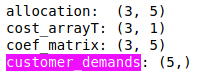

In [89]:
allocationT

array([[x_11, x_21, x_31, x_41, x_51, x_61, x_71, x_81],
       [x_12, x_22, x_32, x_42, x_52, x_62, x_72, x_82],
       [x_13, x_23, x_33, x_43, x_53, x_63, x_73, x_83],
       [x_14, x_24, x_34, x_44, x_54, x_64, x_74, x_84],
       [x_15, x_25, x_35, x_45, x_55, x_65, x_75, x_85],
       [x_16, x_26, x_36, x_46, x_56, x_66, x_76, x_86],
       [x_17, x_27, x_37, x_47, x_57, x_67, x_77, x_87],
       [x_18, x_28, x_38, x_48, x_58, x_68, x_78, x_88],
       [x_19, x_29, x_39, x_49, x_59, x_69, x_79, x_89],
       [x_110, x_210, x_310, x_410, x_510, x_610, x_710, x_810],
       [x_111, x_211, x_311, x_411, x_511, x_611, x_711, x_811],
       [x_112, x_212, x_312, x_412, x_512, x_612, x_712, x_812],
       [x_113, x_213, x_313, x_413, x_513, x_613, x_713, x_813],
       [x_114, x_214, x_314, x_414, x_514, x_614, x_714, x_814],
       [x_115, x_215, x_315, x_415, x_515, x_615, x_715, x_815],
       [x_116, x_216, x_316, x_416, x_516, x_616, x_716, x_816],
       [x_117, x_217, x_317, x_4

In [90]:
for j in range(n_customers):
    print(lpSum(allocationT[j]) >= customer_demands[j])
    model += lpSum(allocationT[j]) >= customer_demands[j] , "Demand Constraints " + str(j)

x_11 + x_21 + x_31 + x_41 + x_51 + x_61 + x_71 + x_81 >= 59
x_12 + x_22 + x_32 + x_42 + x_52 + x_62 + x_72 + x_82 >= 59
x_13 + x_23 + x_33 + x_43 + x_53 + x_63 + x_73 + x_83 >= 70
x_14 + x_24 + x_34 + x_44 + x_54 + x_64 + x_74 + x_84 >= 54
x_15 + x_25 + x_35 + x_45 + x_55 + x_65 + x_75 + x_85 >= 45
x_16 + x_26 + x_36 + x_46 + x_56 + x_66 + x_76 + x_86 >= 57
x_17 + x_27 + x_37 + x_47 + x_57 + x_67 + x_77 + x_87 >= 74
x_18 + x_28 + x_38 + x_48 + x_58 + x_68 + x_78 + x_88 >= 72
x_19 + x_29 + x_39 + x_49 + x_59 + x_69 + x_79 + x_89 >= 60
x_110 + x_210 + x_310 + x_410 + x_510 + x_610 + x_710 + x_810 >= 78
x_111 + x_211 + x_311 + x_411 + x_511 + x_611 + x_711 + x_811 >= 49
x_112 + x_212 + x_312 + x_412 + x_512 + x_612 + x_712 + x_812 >= 62
x_113 + x_213 + x_313 + x_413 + x_513 + x_613 + x_713 + x_813 >= 76
x_114 + x_214 + x_314 + x_414 + x_514 + x_614 + x_714 + x_814 >= 46
x_115 + x_215 + x_315 + x_415 + x_515 + x_615 + x_715 + x_815 >= 56
x_116 + x_216 + x_316 + x_416 + x_516 + x_616 + x_71

In [91]:
model

Przyklad21_STR.132BIS:
MINIMIZE
4059*x_11 + 4488*x_110 + 4092*x_111 + 2574*x_112 + 3729*x_113 + 4158*x_114 + 2508*x_115 + 3630*x_116 + 3960*x_117 + 3201*x_118 + 2409*x_119 + 1947*x_12 + 2343*x_120 + 4587*x_121 + 2838*x_122 + 1980*x_123 + 1881*x_124 + 4719*x_125 + 1848*x_126 + 3201*x_127 + 3465*x_128 + 1551*x_129 + 5115*x_13 + 3762*x_130 + 2838*x_131 + 1683*x_132 + 2673*x_133 + 1353*x_134 + 4752*x_135 + 3333*x_136 + 2640*x_137 + 5082*x_138 + 1782*x_139 + 4422*x_14 + 3003*x_15 + 3894*x_16 + 3597*x_17 + 3993*x_18 + 2442*x_19 + 2772*x_21 + 4224*x_210 + 3663*x_211 + 1815*x_212 + 3960*x_213 + 1518*x_214 + 3168*x_215 + 5181*x_216 + 3861*x_217 + 4026*x_218 + 5049*x_219 + 3663*x_22 + 4752*x_220 + 2772*x_221 + 1881*x_222 + 4917*x_223 + 4356*x_224 + 3564*x_225 + 2409*x_226 + 2739*x_227 + 2211*x_228 + 2673*x_229 + 2343*x_23 + 4257*x_230 + 1518*x_231 + 3795*x_232 + 4158*x_233 + 2937*x_234 + 4191*x_235 + 1782*x_236 + 3399*x_237 + 4125*x_238 + 4983*x_239 + 4125*x_24 + 4257*x_25 + 1452*x_26 + 4059*x_2

<span style="font-size: 150%;color:#990000;background:#f4cccc">Zapisuje problem
    
        Ta funkcja zapisuje specyfikacje (funkcja celu, ograniczenia, zmienne) zdefiniowanego problemu Lp do pliku.

    Wejścia:
    nazwa_pliku - nazwa pliku, który ma zostać utworzony.

In [92]:
#model.writeLP("Przyklad21_STR.132BIS2")

<span style="font-size: 150%;color:#990000;background:#f4cccc">Solve Problem and check Status

In [93]:
print("Prob.solve: ",model.solve())
model.solve()
status =  LpStatus[model.status]
print('Status:     ',status)

Prob.solve:  -1
Status:      Infeasible


<span style="font-size: 150%;color:#990000;background:#f4cccc">Obliczenie wartości funkcji celu i zmiennych decyzyjnych

In [94]:
print("Total Cost:", model.objective.value())
# Decision Variables

dicts = {}
#keys = range(4)
#values = ["Hi", "I", "am", "John"]
for i in model.variables():
    for x in (i.name,i.value()):
        dicts[i] = x

dicts     

Total Cost: 5771764.902440001


{x_11: 0.0,
 x_110: 0.0,
 x_111: 0.0,
 x_112: 0.0,
 x_113: 0.0,
 x_114: 0.0,
 x_115: 0.0,
 x_116: 0.0,
 x_117: 0.0,
 x_118: 0.0,
 x_119: 0.0,
 x_12: 0.0,
 x_120: 0.0,
 x_121: 0.0,
 x_122: 0.0,
 x_123: 0.0,
 x_124: 0.0,
 x_125: 0.0,
 x_126: 0.0,
 x_127: 0.0,
 x_128: 0.0,
 x_129: 81.0,
 x_13: 0.0,
 x_130: 0.0,
 x_131: 0.0,
 x_132: 80.0,
 x_133: 0.0,
 x_134: 70.634146,
 x_135: 0.0,
 x_136: 0.0,
 x_137: 0.0,
 x_138: 0.0,
 x_139: 0.0,
 x_14: 0.0,
 x_15: 0.0,
 x_16: 0.0,
 x_17: 0.0,
 x_18: 0.0,
 x_19: 0.0,
 x_21: 0.0,
 x_210: 0.0,
 x_211: 0.0,
 x_212: 0.0,
 x_213: 0.0,
 x_214: 0.0,
 x_215: 0.0,
 x_216: 0.0,
 x_217: 0.0,
 x_218: 0.0,
 x_219: 0.0,
 x_22: 0.0,
 x_220: 0.0,
 x_221: 0.0,
 x_222: 12.22807,
 x_223: 0.0,
 x_224: 0.0,
 x_225: 0.0,
 x_226: 0.0,
 x_227: 0.0,
 x_228: 0.0,
 x_229: 0.0,
 x_23: 0.0,
 x_230: 0.0,
 x_231: 80.0,
 x_232: 0.0,
 x_233: 0.0,
 x_234: 0.0,
 x_235: 0.0,
 x_236: 71.0,
 x_237: 0.0,
 x_238: 0.0,
 x_239: 0.0,
 x_24: 0.0,
 x_25: 0.0,
 x_26: 57.0,
 x_27: 0.0,
 x_28: 0.0,


In [95]:
G = [*dicts.values()]       # Tworzę listę wartości słownika
G = np.array(G).reshape(n_warehouses,n_customers)    # Tworzę macierz z tej listy
G

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , 81.       ,  0.       ,  0.       ,  0.       ,
        80.       ,  0.       , 70.634146 ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       , 12.22807  ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       , 80.       ,
         0.       ,  0.       ,  0.       ,  0.       , 71.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.

<span style="font-size: 150%;color:#990000;background:#f4cccc"> Poziom wejść do odbiorców

In [96]:
customer_demands

array([[59],
       [59],
       [70],
       [54],
       [45],
       [57],
       [74],
       [72],
       [60],
       [78],
       [49],
       [62],
       [76],
       [46],
       [56],
       [73],
       [71],
       [75],
       [86],
       [60],
       [57],
       [79],
       [56],
       [41],
       [47],
       [50],
       [86],
       [51],
       [81],
       [41],
       [80],
       [80],
       [54],
       [84],
       [47],
       [71],
       [61],
       [65],
       [44]])

In [97]:
print('Podsumowanie wierszy macierzy',np.sum(G, axis = 0))

Podsumowanie wierszy macierzy [59.        78.        48.9999998 62.        76.        46.
 56.        73.        71.        75.        86.0000001 59.
 60.        57.        79.        56.        41.        47.
 50.        86.        51.        81.        70.        41.
 80.        80.        54.        84.        47.        71.
 61.        65.        44.        54.        45.        57.
 74.        71.9999995 60.       ]


<span style="font-size: 150%;color:#990000;background:#f4cccc"> Poziom wyjścia z hurtowni

$
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}}\leqslant 10800 \\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}}  \leqslant 10800 )\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}} \leqslant 10800\\
$

In [98]:
coef_matrix

array([[123,  59, 155, 134,  91, 118, 109, 121,  74, 136, 124,  78, 113,
        126,  76, 110, 120,  97,  73,  71, 139,  86,  60,  57, 143,  56,
         97, 105,  47, 114,  86,  51,  81,  41, 144, 101,  80, 154,  54],
       [ 84, 111,  71, 125, 129,  44, 123, 106, 157, 128, 111,  55, 120,
         46,  96, 157, 117, 122, 153, 144,  84,  57, 149, 132, 108,  73,
         83,  67,  81, 129,  46, 115, 126,  89, 127,  54, 103, 125, 151],
       [ 98, 142, 116, 124, 128, 145,  69, 153,  44,  98,  54,  59, 151,
        105,  78, 156,  70, 134,  45,  94,  87, 100, 107, 150, 100,  90,
         76, 132,  75, 136, 128, 125, 112,  97,  97, 150,  88, 130, 138],
       [ 75, 103,  57, 102, 112,  87, 126,  68, 158, 146, 120, 138, 145,
         89,  99,  49, 111, 133, 115,  81, 107, 110,  57,  40,  99,  88,
        102, 125, 131,  93, 158,  91,  44,  91, 136, 145,  87,  55,  61],
       [ 46,  54, 158, 139, 146, 138,  82,  43, 104,  46,  83, 143,  69,
         50, 101, 107, 117,  83,  49, 143,  91,

In [99]:
GK = coef_matrix*G
GK

array([[    0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,  6966.       ,     0.       ,     0.       ,
            0.       ,  4480.       ,     0.       ,  7416.58533  ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ],
       [    0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.       ,
            0.       ,     0.       ,  1173.89472  ,     0.       ,
            0.       ,     0.       ,     0.       ,     0.   

In [100]:
print('Podsumowanie wierszy macierzy',np.sum(GK, axis = 1))

Podsumowanie wierszy macierzy [18862.58533   22050.89472   21106.4239434 81555.417655  21538.000002
 19470.029801  23807.5900049 22879.259281 ]


<span style="font-size: 150%;color:yellow;background:Black">NARZĘDZIE DIAGNOSTYCZNE DLA ZMIENNYCH POWYŻEJ 9
    
<span style="font-size: 130%;color:yellow;background:Black"> 1. Przerabiam słownik na dataframe ma inaczej mam problem z posortowaniem tego w odpowiedni sposób   

In [101]:
# dicts jest słownikiem wynikowym

PKP = pd.DataFrame.from_dict(dicts, orient="index").reset_index(0)
PKP.columns = ['keys', 'Value']
PKP

,keys,Value
0,x_11,0.0
1,x_110,0.0
2,x_111,0.0
3,x_112,0.0
4,x_113,0.0
...,...,...
307,x_85,0.0
308,x_86,0.0
309,x_87,0.0
310,x_88,0.0


<span style="font-size: 130%;color:yellow;background:Black"> 2. Porządkuje dataframe

In [102]:
PKP["order1"] = PKP["keys"]
PKP["order1"] = PKP["order1"].astype(str)
PKP["keys"] = PKP["keys"].astype(str)
PKP.head(4)

,keys,Value,order1
0,x_11,0.0,x_11
1,x_110,0.0,x_110
2,x_111,0.0,x_111
3,x_112,0.0,x_112


In [103]:
PKP.dtypes

keys       object
Value     float64
order1     object
dtype: object

<span style="font-size: 130%;color:yellow;background:Black"> 2. Wydzielam dwa rodzaje znaczników do sortowania


In [104]:
PKP.order1 = PKP.order1.str.replace(' ', '')
PKP.order1 = PKP.order1.str.slice(2,3)

PKP.head(12)

,keys,Value,order1
0,x_11,0.0,1
1,x_110,0.0,1
2,x_111,0.0,1
3,x_112,0.0,1
4,x_113,0.0,1
5,x_114,0.0,1
6,x_115,0.0,1
7,x_116,0.0,1
8,x_117,0.0,1
9,x_118,0.0,1


In [105]:
PKP["order2"] = PKP["keys"]
PKP["order2"] = PKP["order2"].astype(str)
PKP.order2 = PKP.order2.str.slice(3,5)
PKP.head(12)

,keys,Value,order1,order2
0,x_11,0.0,1,1
1,x_110,0.0,1,10
2,x_111,0.0,1,11
3,x_112,0.0,1,12
4,x_113,0.0,1,13
5,x_114,0.0,1,14
6,x_115,0.0,1,15
7,x_116,0.0,1,16
8,x_117,0.0,1,17
9,x_118,0.0,1,18


<span style="font-size: 130%;color:yellow;background:Black"> 3. sortuje

In [106]:
PKP["order1"] = PKP["order1"].astype(int)
PKP["order2"] = PKP["order2"].astype(int)

sorted_dict = PKP.sort_values(['order1','order2'])
sorted_dict.head(24)

,keys,Value,order1,order2
0,x_11,0.0,1,1
11,x_12,0.0,1,2
22,x_13,0.0,1,3
33,x_14,0.0,1,4
34,x_15,0.0,1,5
35,x_16,0.0,1,6
36,x_17,0.0,1,7
37,x_18,0.0,1,8
38,x_19,0.0,1,9
1,x_110,0.0,1,10


<span style="font-size: 130%;color:yellow;background:Black"> 4. Tworzę macierz diagnostyczną

In [107]:
res2 = sorted_dict.pivot_table(index='order1', columns='order2', values='Value',aggfunc = "sum", margins=True).reset_index()
res2

order2,order1,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,All
0,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,80.0,0.0,70.634146,0.0,0.0,0.0,0.0,0.0,231.634146
1,2,0.000000,0.0,0.0,0.0,0.0,57.0,0.0,0.000000,0.0,...,80.0,0.0,0.0,0.000000,0.0,71.0,0.0,0.0,0.0,220.228070
2,3,0.000000,0.0,0.0,0.0,0.0,0.0,74.0,0.000000,60.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,186.196352
3,4,55.173913,0.0,70.0,54.0,0.0,0.0,0.0,66.744602,0.0,...,0.0,0.0,54.0,0.000000,0.0,0.0,0.0,65.0,44.0,925.690445
4,5,3.826087,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,61.0,0.0,0.0,239.826087
5,6,0.000000,59.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,47.0,0.0,0.0,0.0,0.0,204.059701
6,7,0.000000,0.0,0.0,0.0,45.0,0.0,0.0,5.255397,0.0,...,0.0,0.0,0.0,13.365854,0.0,0.0,0.0,0.0,0.0,190.347897
7,8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,259.017301
8,All,59.000000,59.0,70.0,54.0,45.0,57.0,74.0,72.000000,60.0,...,80.0,80.0,54.0,84.000000,47.0,71.0,61.0,65.0,44.0,2456.999999


In [108]:
customer_demands.transpose() 

array([[59, 59, 70, 54, 45, 57, 74, 72, 60, 78, 49, 62, 76, 46, 56, 73,
        71, 75, 86, 60, 57, 79, 56, 41, 47, 50, 86, 51, 81, 41, 80, 80,
        54, 84, 47, 71, 61, 65, 44]])

<span style="font-size: 150%;color:#cfe2f3;background:#45818e">Sprawdzam czy ograniczenia (nie wiecej niż) są zachowane dla warehouse

In [109]:
warehouse_supply

array([[10783],
       [10719],
       [10794],
       [10751],
       [10778],
       [10769],
       [10781],
       [10734]])

<span style="font-size: 130%;color:yellow;background:Black"> 5. Wydzielam z macierzy wynikowej same kolumny i aktywne wiersze

In [110]:
res2.columns

Index(['order1',        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,    'All'],
      dtype='object', name='order2')

In [127]:
res3 = res2[[1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39]]  #<-- aktywne kolumny
res3 = res3.iloc[0:8,:]   #<-- aktywne wiersze
res3

order2,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,80.0,0.0,70.634146,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,57.0,0.0,0.000000,0.0,0.0,...,0.0,80.0,0.0,0.0,0.000000,0.0,71.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,74.0,0.000000,60.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,55.173913,0.0,70.0,54.0,0.0,0.0,0.0,66.744602,0.0,0.0,...,41.0,0.0,0.0,54.0,0.000000,0.0,0.0,0.0,65.0,44.0
4,3.826087,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,78.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,61.0,0.0,0.0
5,0.000000,59.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,47.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,45.0,0.0,0.0,5.255397,0.0,0.0,...,0.0,0.0,0.0,0.0,13.365854,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


<span style="font-size: 130%;color:yellow;background:Black"> 6. Przetwarzam na macierz żeby ja pomnozyć przez współczynniki

In [128]:
columns = res3.columns

res3 = res3[columns]

res3 = np.array(res3)  
res3

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       , 81.       ,  0.       ,
         0.       , 80.       ,  0.       , 70.634146 ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        57.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , 12.22807  ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        80.       ,  0.       ,  0.       ,  0.       ,  0.

In [129]:
customer_demands.transpose() 

array([[59, 59, 70, 54, 45, 57, 74, 72, 60, 78, 49, 62, 76, 46, 56, 73,
        71, 75, 86, 60, 57, 79, 56, 41, 47, 50, 86, 51, 81, 41, 80, 80,
        54, 84, 47, 71, 61, 65, 44]])

In [130]:
print('customer_demands_model',np.sum(res3, axis = 0))

customer_demands_model [59.        59.        70.        54.        45.        57.
 74.        71.9999995 60.        78.        48.9999998 62.
 76.        46.        56.        73.        71.        75.
 86.0000001 60.        57.        79.        56.        41.
 47.        50.        86.        51.        81.        41.
 80.        80.        54.        84.        47.        71.
 61.        65.        44.       ]


In [131]:
customer_demandsT = customer_demands.transpose() 

In [132]:
res3T = res3.transpose() 

<span style="font-size: 130%;color:yellow;background:Black"> 7. Mnoże przez współczynniki i porównuje

In [133]:
GT = res3*coef_matrix
GT

array([[   0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
        3807.       ,    0.       ,    0.       , 4080.       ,
           0.       , 2895.999986 ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ],
       [   0.       ,    0.       ,    0.       ,    0.       ,
           0.       , 2508.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,  696.99999  ,    0.       ,    

In [134]:
print('Podsumowanie kolumn macierzy',np.sum(GT, axis = 1))

Podsumowanie kolumn macierzy [10782.999986  10718.99999   10794.0000305 71963.588711  10778.000002
 10768.999967  10781.0000129 10733.999996 ]


In [ ]:
warehouse_supply

In [ ]:
model
